In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import pylab as py
import matplotlib.pyplot as plt
import sklearn.model_selection as mods
import sklearn.linear_model as sklin
import sklearn.tree as st
#import xgboost as xgb


In [2]:
df=pd.read_csv('c:/temp/TestPredictionResults/TestPredictionResults_23-05-07_08-51-44.csv')

In [3]:
df.head()

,TestProgram_Name_NA,Family,IsConcurrent,Patterns_Count,Tests_Count,Mtt_Count,ConcurrentFlows_Count,Shmoo_tests_count,ITuff_Temperature_NA,ITuff_SubmitterFullName_NA,ITuff_Lot_NA,ituff_EndDate_NA,ITuff_PartType_FromSpark,ITuff_BomGroup_FromSpark,ITuff_ProcessStep_FromSpark,ITuff_ExperimentType_FromSpark,ITuff_PerUnit_IsPassed_Target_NA,ITuff_PerUnit_testTimeInMS_Target
0,RPLP282_IDUT,RPL,True,16006,15534,0,3,313,-5,"Michailov, Viktor",Y318221MV,5/7/2023 8:30:31 AM,H64ASLFVQ,CLASS_RPLP282,CLASSCOLD,Engineering,True,530.029011
1,RPLP282_IDUT,RPL,True,16006,15534,0,3,313,-5,"Michailov, Viktor",Y318221MV,5/7/2023 8:30:31 AM,H64ASLFVQ,CLASS_RPLP282,CLASSCOLD,Engineering,True,496.311662
2,RPLP282_IDUT,RPL,True,16006,15534,0,3,313,-5,"Michailov, Viktor",Y318221MV,5/7/2023 8:30:31 AM,H64ASLFVQ,CLASS_RPLP282,CLASSCOLD,Engineering,True,499.351486
3,RPLP282_IDUT,RPL,True,16006,15534,0,3,313,-5,"Michailov, Viktor",Y318221MV,5/7/2023 8:30:31 AM,H64ASLFVQ,CLASS_RPLP282,CLASSCOLD,Engineering,True,549.158977
4,RPLP282_IDUT,RPL,True,16006,15534,0,3,313,-5,"Michailov, Viktor",Y318221MV,5/7/2023 8:30:31 AM,H64ASLFVQ,CLASS_RPLP282,CLASSCOLD,Engineering,True,491.278113


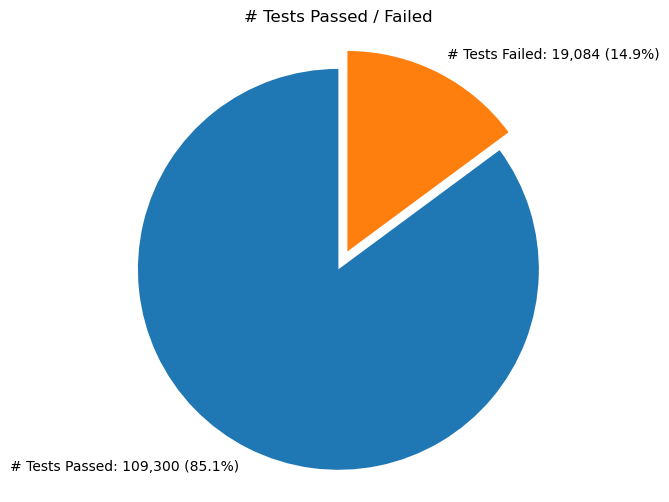

In [4]:
# Graph of Tests Passed / Failed

# data on number of tests passed and failed
testFailureData = {'# Tests Passed': len(df[df['ITuff_PerUnit_IsPassed_Target_NA'] == True]), '# Tests Failed': len(df[df['ITuff_PerUnit_IsPassed_Target_NA'] == False])}

# Convert the dictionary to a pandas DataFrame
df1 = pd.DataFrame.from_dict(testFailureData, orient='index', columns=['Tests'])

# create a pie chart
fig, ax = plt.subplots(figsize=(8, 6))
explode = (0.1, 0)  # explode the first slice

# calculate the percentages and display them on the chart
percentages = df1['Tests'] / df1['Tests'].sum() * 100
labels = [f'{df1.index[i]}: {df1.Tests[i]:,.0f} ({percentages[i]:.1f}%)' for i in range(len(df1))]
ax.pie(df1['Tests'], explode=explode, labels=labels, autopct='', startangle=90)
ax.axis('equal')

# set the title of the chart
plt.title('# Tests Passed / Failed')

# display the chart
plt.show()


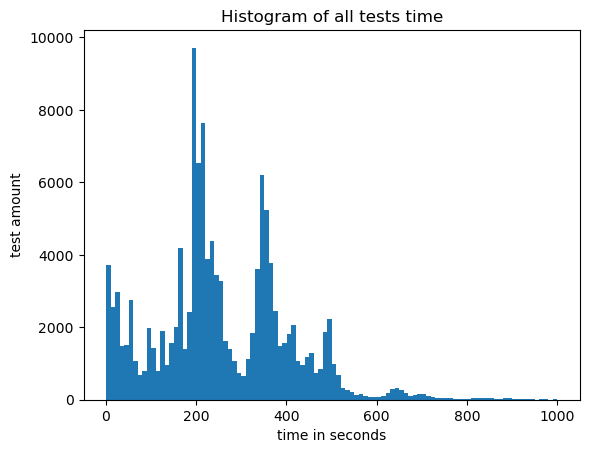

In [5]:
# all tests time histogrm
all_tests_time = df[df['ITuff_PerUnit_testTimeInMS_Target']<1000]
plt.hist(all_tests_time['ITuff_PerUnit_testTimeInMS_Target'], bins=100)

# Add labels and titles
plt.xlabel('time in seconds')
plt.ylabel('test amount')
plt.title('Histogram of all tests time')

# Show the plot
plt.show()

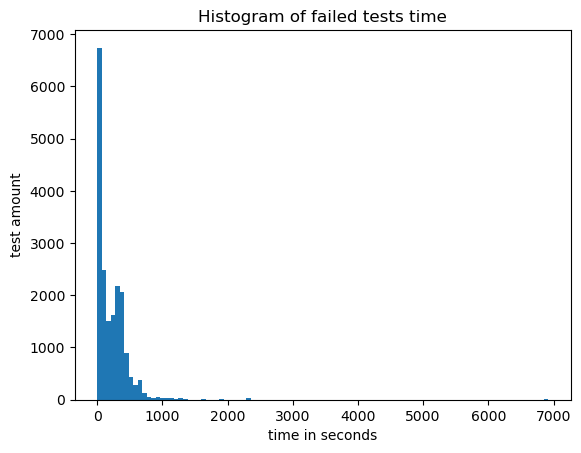

In [6]:
# failed tests time histogrm

failed_records = df[df['ITuff_PerUnit_IsPassed_Target_NA'] == False]

plt.hist(failed_records['ITuff_PerUnit_testTimeInMS_Target'], bins=100)

# Add labels and titles
plt.xlabel('time in seconds')
plt.ylabel('test amount')
plt.title('Histogram of failed tests time')

# Show the plot
plt.show()

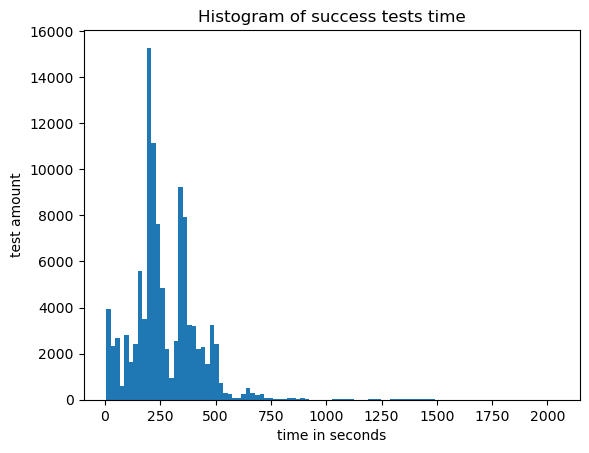

In [7]:
# success tests time histogrm

success_records = df[df['ITuff_PerUnit_IsPassed_Target_NA'] == True]

plt.hist(success_records['ITuff_PerUnit_testTimeInMS_Target'], bins=100)

# Add labels and titles
plt.xlabel('time in seconds')
plt.ylabel('test amount')
plt.title('Histogram of success tests time')

# Show the plot
plt.show()

In [8]:
min_time = 100
max_time = 550

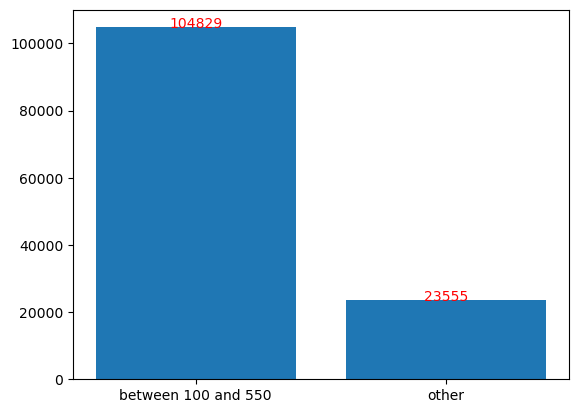

In [9]:
# add graph of how many above max_time

total = len(df['ITuff_PerUnit_testTimeInMS_Target'])

filtered_by_min_and_max = df[(df['ITuff_PerUnit_testTimeInMS_Target'] > max_time) | (df['ITuff_PerUnit_testTimeInMS_Target']< min_time)]
count = len(filtered_by_min_and_max)
#print(len(df[df['ITuff_PerUnit_testTimeInMS_Target'] > max_time]))

categories = ['between '+str(min_time) + ' and ' +str(max_time), 'other']
values = [total-count, count]

# Set up the figure and axis
fig, ax = plt.subplots()

# Set the x-axis ticks and labels
ax.set_xticks(range(len(categories)))
ax.set_xticklabels(categories)

# Create the bar plot
ax.bar(range(len(categories)), values)

# Add values to the bars
for i, val in enumerate(values):
    ax.text(i, val + 0.5, str(val), ha='center', fontsize=10, color='red')

# Show the plot
plt.show()

In [10]:
print(len(filtered_by_min_and_max))
df = df.drop(filtered_by_min_and_max.index)

23555


In [11]:
#sb.pairplot(df.head(5)) # after dummies

In [12]:
#sb.displot(df['Shmoo_tests_count'])

In [13]:
df.corr()

,IsConcurrent,Patterns_Count,Tests_Count,Mtt_Count,ConcurrentFlows_Count,Shmoo_tests_count,ITuff_Temperature_NA,ITuff_PerUnit_IsPassed_Target_NA,ITuff_PerUnit_testTimeInMS_Target
IsConcurrent,1.000000,-0.361733,0.035472,NaN,1.000000,0.415156,-0.037556,-0.054529,0.312864
Patterns_Count,-0.361733,1.000000,0.498314,NaN,-0.361733,-0.074896,-0.012984,0.095078,-0.057070
Tests_Count,0.035472,0.498314,1.000000,NaN,0.035472,0.561687,-0.035232,0.125420,0.221329
Mtt_Count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ConcurrentFlows_Count,1.000000,-0.361733,0.035472,NaN,1.000000,0.415156,-0.037556,-0.054529,0.312864
Shmoo_tests_count,0.415156,-0.074896,0.561687,NaN,0.415156,1.000000,-0.007181,0.022265,0.431593
ITuff_Temperature_NA,-0.037556,-0.012984,-0.035232,NaN,-0.037556,-0.007181,1.000000,-0.139053,0.278493
ITuff_PerUnit_IsPassed_Target_NA,-0.054529,0.095078,0.125420,NaN,-0.054529,0.022265,-0.139053,1.000000,-0.013722
ITuff_PerUnit_testTimeInMS_Target,0.312864,-0.057070,0.221329,NaN,0.312864,0.431593,0.278493,-0.013722,1.000000


In [14]:
df.describe()

,Patterns_Count,Tests_Count,Mtt_Count,ConcurrentFlows_Count,Shmoo_tests_count,ITuff_Temperature_NA,ITuff_PerUnit_testTimeInMS_Target
count,104829.000000,104829.000000,104829.0,104829.000000,104829.000000,104829.000000,104829.000000
mean,18410.217945,13620.841361,0.0,1.582205,272.390464,63.287592,284.438801
std,5533.806541,2539.201792,0.0,1.497753,118.724854,48.481345,105.616560
min,477.000000,830.000000,0.0,0.000000,1.000000,-5.000000,100.020645
25%,17026.000000,13128.000000,0.0,0.000000,216.000000,0.000000,200.423905
50%,17545.000000,13698.000000,0.0,3.000000,248.000000,95.000000,250.926226
75%,20322.000000,14837.000000,0.0,3.000000,313.000000,100.000000,359.532063
max,59123.000000,19503.000000,0.0,3.000000,590.000000,100.000000,549.973772


In [15]:
df.groupby('IsConcurrent').count()

,TestProgram_Name_NA,Family,Patterns_Count,Tests_Count,Mtt_Count,ConcurrentFlows_Count,Shmoo_tests_count,ITuff_Temperature_NA,ITuff_SubmitterFullName_NA,ITuff_Lot_NA,ituff_EndDate_NA,ITuff_PartType_FromSpark,ITuff_BomGroup_FromSpark,ITuff_ProcessStep_FromSpark,ITuff_ExperimentType_FromSpark,ITuff_PerUnit_IsPassed_Target_NA,ITuff_PerUnit_testTimeInMS_Target
IsConcurrent,,,,,,,,,,,,,,,,,
False,49542,49542,49542,49542,49542,49542,49542,49542,49542,49542,49542,49542,49542,49542,49542,49542,49542
True,55287,55287,55287,55287,55287,55287,55287,55287,55287,55287,55287,55287,55287,55287,55287,55287,55287


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104829 entries, 0 to 128383
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   TestProgram_Name_NA                104829 non-null  object 
 1   Family                             104829 non-null  object 
 2   IsConcurrent                       104829 non-null  bool   
 3   Patterns_Count                     104829 non-null  int64  
 4   Tests_Count                        104829 non-null  int64  
 5   Mtt_Count                          104829 non-null  int64  
 6   ConcurrentFlows_Count              104829 non-null  int64  
 7   Shmoo_tests_count                  104829 non-null  int64  
 8   ITuff_Temperature_NA               104829 non-null  int64  
 9   ITuff_SubmitterFullName_NA         104829 non-null  object 
 10  ITuff_Lot_NA                       104829 non-null  object 
 11  ituff_EndDate_NA                   1048

In [17]:
df.drop(['TestProgram_Name_NA','ITuff_Temperature_NA','ITuff_SubmitterFullName_NA','ITuff_Lot_NA', 'ituff_EndDate_NA','ITuff_PerUnit_IsPassed_Target_NA'], axis=1, inplace=True)
#df.drop(['ConcurrentFlows_Count'], axis=1, inplace=True)                # ConcurrentFlows_Count doesn't change result
#df.drop(['IsConcurrent'], axis=1, inplace=True)                         # 'IsConcurrent' doesn’t change result
df.drop(['Family'], axis=1, inplace=True)                               # 'Family' doesn’t change result
#df.drop(['Patterns_Count'], axis=1, inplace=True)                       # Patterns_Count helps a little
#df.drop(['Tests_Count'], axis=1, inplace=True)                         # Tests_Count helps a little
#df.drop(['Shmoo_tests_count'], axis=1, inplace=True)                   # Shmoo_tests_count helps a little
df.drop(['ITuff_BomGroup_FromSpark'], axis=1, inplace=True)
#df.drop(['ITuff_ProcessStep_FromSpark'], axis=1, inplace=True)         # ITuff_ProcessStep_FromSpark is critical
#df.drop(['ITuff_ExperimentType_FromSpark'], axis=1, inplace=True)      # ITuff_ExperimentType_FromSpark helps a little

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104829 entries, 0 to 128383
Data columns (total 10 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   IsConcurrent                       104829 non-null  bool   
 1   Patterns_Count                     104829 non-null  int64  
 2   Tests_Count                        104829 non-null  int64  
 3   Mtt_Count                          104829 non-null  int64  
 4   ConcurrentFlows_Count              104829 non-null  int64  
 5   Shmoo_tests_count                  104829 non-null  int64  
 6   ITuff_PartType_FromSpark           104829 non-null  object 
 7   ITuff_ProcessStep_FromSpark        104829 non-null  object 
 8   ITuff_ExperimentType_FromSpark     104829 non-null  object 
 9   ITuff_PerUnit_testTimeInMS_Target  104829 non-null  float64
dtypes: bool(1), float64(1), int64(5), object(3)
memory usage: 8.1+ MB


In [19]:
#df = pd.get_dummies(df, columns =['Family'])
df = pd.get_dummies(df, columns =['ITuff_PartType_FromSpark'])
#df = pd.get_dummies(df, columns =['ITuff_BomGroup_FromSpark'])
df = pd.get_dummies(df, columns =['ITuff_ProcessStep_FromSpark'])
df = pd.get_dummies(df, columns =['ITuff_ExperimentType_FromSpark'])


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104829 entries, 0 to 128383
Data columns (total 82 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   IsConcurrent                                104829 non-null  bool   
 1   Patterns_Count                              104829 non-null  int64  
 2   Tests_Count                                 104829 non-null  int64  
 3   Mtt_Count                                   104829 non-null  int64  
 4   ConcurrentFlows_Count                       104829 non-null  int64  
 5   Shmoo_tests_count                           104829 non-null  int64  
 6   ITuff_PerUnit_testTimeInMS_Target           104829 non-null  float64
 7   ITuff_PartType_FromSpark_H64ADNSVAL         104829 non-null  uint8  
 8   ITuff_PartType_FromSpark_H64AHSFVCC         104829 non-null  uint8  
 9   ITuff_PartType_FromSpark_H64ALNAVBJ         104829 non-null  uint8  
 

In [21]:
df.describe()

,Patterns_Count,Tests_Count,Mtt_Count,ConcurrentFlows_Count,Shmoo_tests_count,ITuff_PerUnit_testTimeInMS_Target,ITuff_PartType_FromSpark_H64ADNSVAL,ITuff_PartType_FromSpark_H64AHSFVCC,ITuff_PartType_FromSpark_H64ALNAVBJ,ITuff_PartType_FromSpark_H64ALNMVBJ,...,ITuff_ProcessStep_FromSpark_CLASSHOT,ITuff_ProcessStep_FromSpark_CLASSHOTR,ITuff_ProcessStep_FromSpark_CSM,ITuff_ProcessStep_FromSpark_PHMCOLD,ITuff_ProcessStep_FromSpark_PHMCOLDR,ITuff_ProcessStep_FromSpark_PHMHOT,ITuff_ProcessStep_FromSpark_PHMHOTR,ITuff_ExperimentType_FromSpark_Correlation,ITuff_ExperimentType_FromSpark_Engineering,ITuff_ExperimentType_FromSpark_WalkTheLot
count,104829.000000,104829.000000,104829.0,104829.000000,104829.000000,104829.000000,104829.000000,104829.000000,104829.000000,104829.000000,...,104829.000000,104829.000000,104829.000000,104829.000000,104829.000000,104829.000000,104829.000000,104829.000000,104829.000000,104829.000000
mean,18410.217945,13620.841361,0.0,1.582205,272.390464,284.438801,0.000105,0.003081,0.010818,0.004016,...,0.486039,0.004569,0.025003,0.130365,0.004932,0.153812,0.003778,0.562526,0.432046,0.005428
std,5533.806541,2539.201792,0.0,1.497753,118.724854,105.616560,0.010243,0.055423,0.103444,0.063245,...,0.499807,0.067443,0.156134,0.336706,0.070054,0.360771,0.061346,0.496078,0.495363,0.073474
min,477.000000,830.000000,0.0,0.000000,1.000000,100.020645,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17026.000000,13128.000000,0.0,0.000000,216.000000,200.423905,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17545.000000,13698.000000,0.0,3.000000,248.000000,250.926226,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,20322.000000,14837.000000,0.0,3.000000,313.000000,359.532063,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,59123.000000,19503.000000,0.0,3.000000,590.000000,549.973772,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
#df.Family_RaptorLake.value_counts()

In [23]:
#sb.pairplot(df,hue='ITuff_PerUnit_testTimeInMS_Target',)

In [24]:
#plt.hist(df['ITuff_PerUnit_testTimeInMS_Target'])
#plt.show()

In [25]:
#sb.displot(df['ITuff_PerUnit_testTimeInMS_Target']) 

In [26]:
x = df.drop(['ITuff_PerUnit_testTimeInMS_Target'],axis=1)
y = df.ITuff_PerUnit_testTimeInMS_Target

In [27]:
x_train, x_test, y_train, y_test = mods.train_test_split(x, y, test_size=0.30,random_state=101)

In [28]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from xgboost import XGBRegressor

#sklin.LinearRegression
#model = sklin.LinearRegression()

#Ridge
# model = Ridge(alpha=1.0)

#Lasso
#model = Lasso(alpha=0.1)

#model  = ElasticNet(alpha=0.1, l1_ratio=0.5)

#model = BayesianRidge()

model = XGBRegressor()


In [29]:
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [30]:
y_pred = model.predict(x_test)

In [31]:
y_check = y_pred / y_test * 100

Text(0, 0.5, 'tests amount')

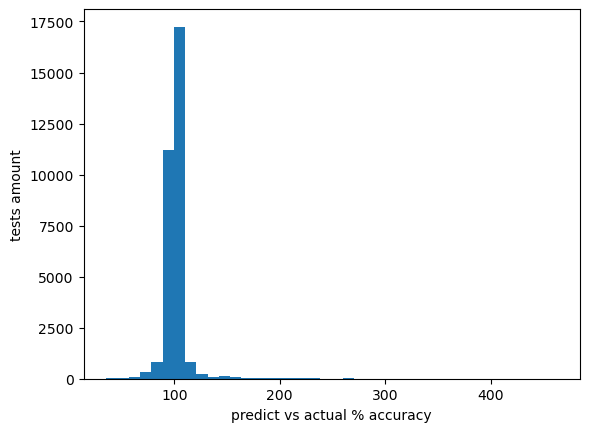

In [32]:
plt.hist(y_check, 40)
plt.xlabel('predict vs actual % accuracy')
plt.ylabel('tests amount')

In [33]:
import matplotlib.pyplot as plt

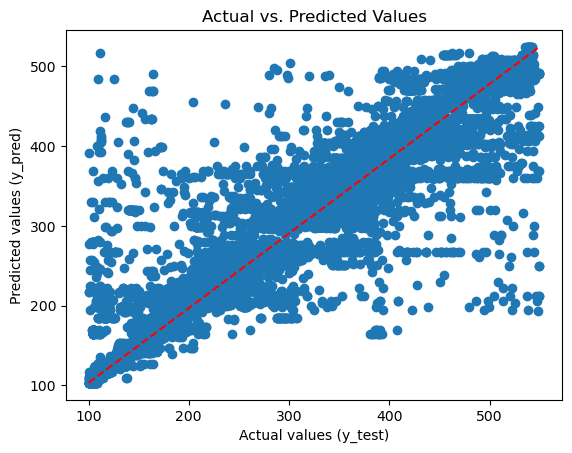

In [34]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)],'--', color='red')
plt.xlabel('Actual values (y_test)')
plt.ylabel('Predicted values (y_pred)')
plt.title('Actual vs. Predicted Values')
plt.show()

In [35]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [36]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# print the results
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R-squared: ", r2)
print("MAE: ", mae)

MSE:  961.4173392688763
RMSE:  31.006730547880668
R-squared:  0.9135788460742374
MAE:  14.207577305528046
